# 数据覆盖全 10dB以上有拐点

2023-05-26 10:48:05.057722: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of GPUs available : 0
|                                                                            Data Group 1                                                                           |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  EBN0[DB]  |  SER(ZF)  |  BER(ZF)  | Bit Errors(ZF) |  SER(LMMSE)  |  BER(LMMSE)  | Bit Errors(LMMSE) |  SER(DIP)  |  BER(DIP)  | Bit Errors(DIP) | Time Spent(s) |
|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|         0.0|  2.490e-01|  1.423e-01|             583|     1.309e-01|     6.958e-02|                285|   7.568e-02|   3.979e-02|              163|      3.636e+01|
|--------------------------------------------------------------------------------------------------------------------------------------------

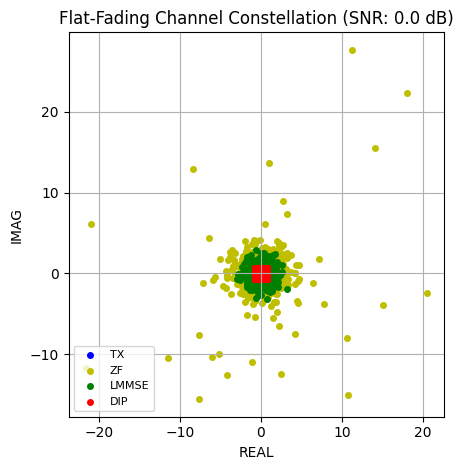

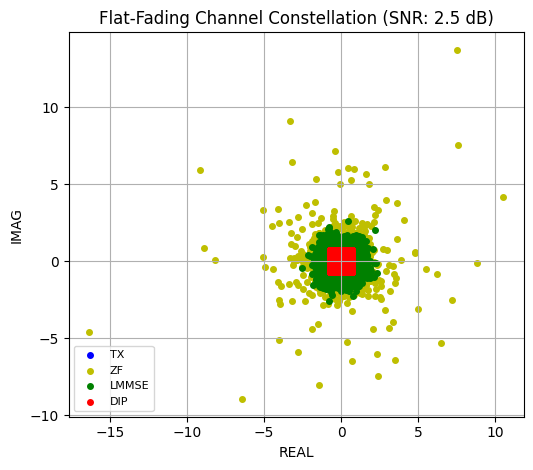

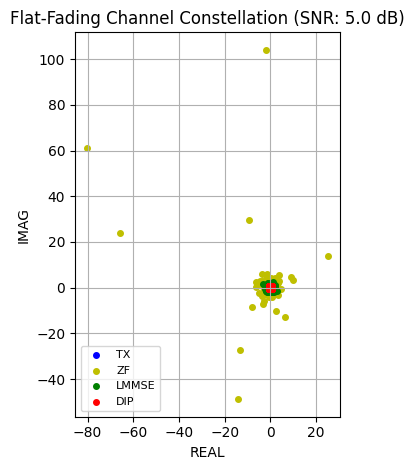

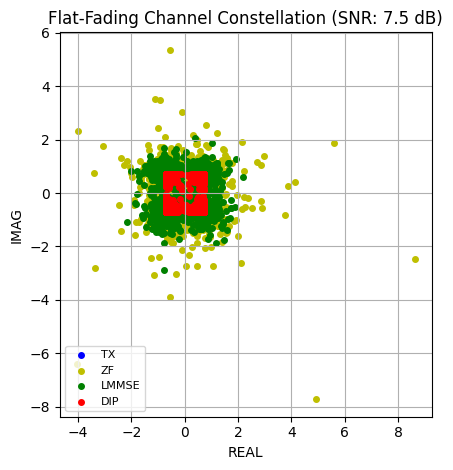

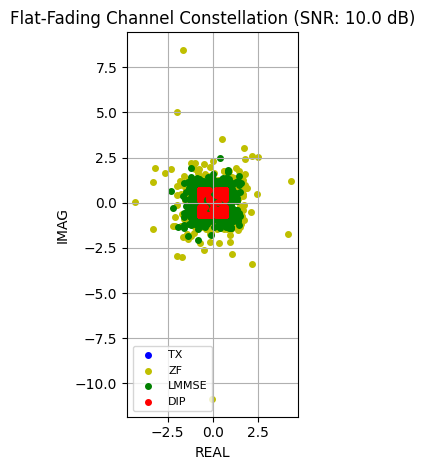

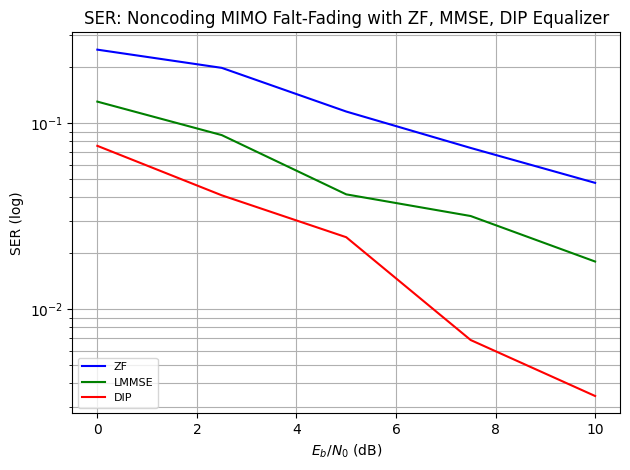

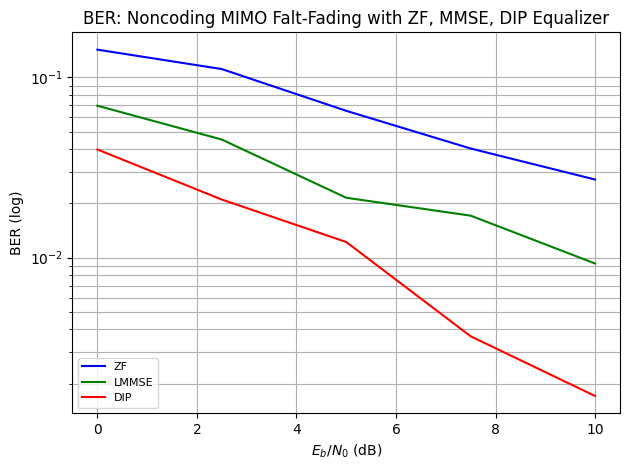

Loading BokehJS ...

Loading BokehJS ...

(array([ 0. ,  2.5,  5. ,  7.5, 10. ]),
 array([0.24902344, 0.19873047, 0.11572266, 0.07373047, 0.04785156]),
 array([0.13085938, 0.08642578, 0.04150391, 0.03173828, 0.01806641]),
 array([0.07568359, 0.04101562, 0.02441406, 0.00683594, 0.00341797]))

In [1]:
# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
# also try %matplotlib widget

import matplotlib.pyplot as plt

# for performance measurements
import time

# For the implementation of the Keras models
from tensorflow import keras
from keras import Model
from NCodeNCorr import ncodencorr

Block_Length = 32           # Block Length (k)
NUM_BITS_PER_SYMBOL = 2    # Mapping: 4QAM
CONSTELLATION_TYPE = "qam" #
DEMAPPING_METHOD = "app"   # Demapping Method: "app"
NUM_TX_ANT = 4             # Transmit Antennas
NUM_RX_ANT = 4             # Receive Antennas

NUM_DATA_GROUP = 1         # Number of Data Group
BATCH_SIZE = 32             # Number of Parallelly Processed Batches
EBN0_DB_MIN = 0.0        # Minimum Eb/N0 (dB)
EBN0_DB_MAX = 10.0         # Maximum Eb/N0 (dB)
NUM_EBN0_POINTS = 5        # EBNO Points

model_uncoded_ff = ncodencorr(Block_Length, 
                              NUM_BITS_PER_SYMBOL,
                              CONSTELLATION_TYPE,
                              DEMAPPING_METHOD,
                              NUM_RX_ANT,
                              NUM_TX_ANT)

model_uncoded_ff(NUM_DATA_GROUP, BATCH_SIZE, EBN0_DB_MIN, EBN0_DB_MAX, NUM_EBN0_POINTS)